In [21]:
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plt.style.use('ggplot')

%matplotlib inline

def sp_noise(image, prob=0.01):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [82]:
# center = [x, y]
def crop_rect(img, center, w, h, return_pos=False):
    #center = [750, 900]
    #h = 200
    #w = 200
    x = int(center[0] - w/2)
    y = int(center[1] - h/2)
    try:
        crop_img = img[y:y+h, x:x+w]
    except:
        crop_img = None
    #plt.imshow(crop_img);
    
    if return_pos:
        return [y, y+h, x, x+w], crop_img
    else:
        return crop_img

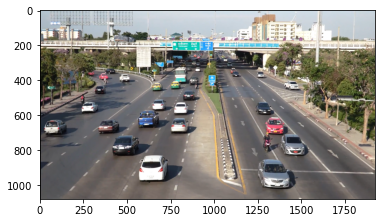

In [83]:
img = cv2.imread("../car_detection_sample1.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

# Test image crop function

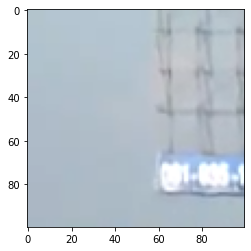

In [84]:
crop_img = crop_rect(img, [50, 50], 100, 100)
plt.imshow(crop_img);

0 100 0 100


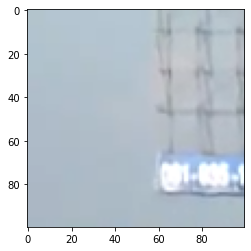

In [86]:
[y0, y1, x0, x1], crop_img = crop_rect(img, [50, 50], 100, 100, True)
print(y0, y1, x0, x1)
plt.imshow(crop_img);

# Test random crop

center: [1182 461]


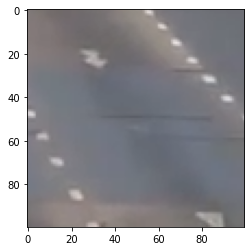

center: [590 392]


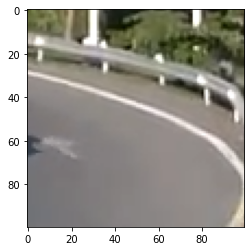

center: [1705 648]


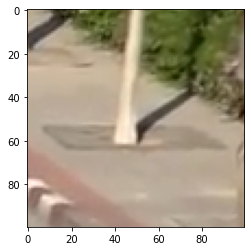

In [81]:
w = 100
h = 100

for i in range(3):
    cx = random.randint(w, img.shape[1]-w)
    cy = random.randint(w, img.shape[0]-h)
    crop_img = crop_rect(img, [cx, cy], w, h)
    print("center: [{} {}]".format(cx, cy))
    plt.imshow(crop_img)
    plt.show()

# Place a processed part back to img

center: [1180 305]


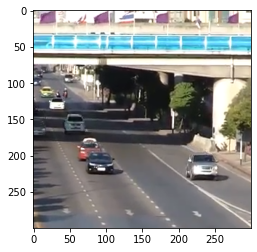

155 455 1030 1330


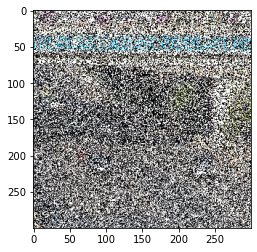

In [96]:
w = 300
h = 300

cx = random.randint(w, img.shape[1]-w)
cy = random.randint(w, img.shape[0]-h)
[y0, y1, x0, x1], crop_img = crop_rect(img, [cx, cy], w, h, True)
print("center: [{} {}]".format(cx, cy))
plt.imshow(crop_img)
plt.show()


# [y0, y1, x0, x1], crop_img = crop_rect(img, [200, 200], 200, 200, True)
print(y0, y1, x0, x1)
crop_img = sp_noise(crop_img, 0.35)
plt.imshow(crop_img)
plt.show()

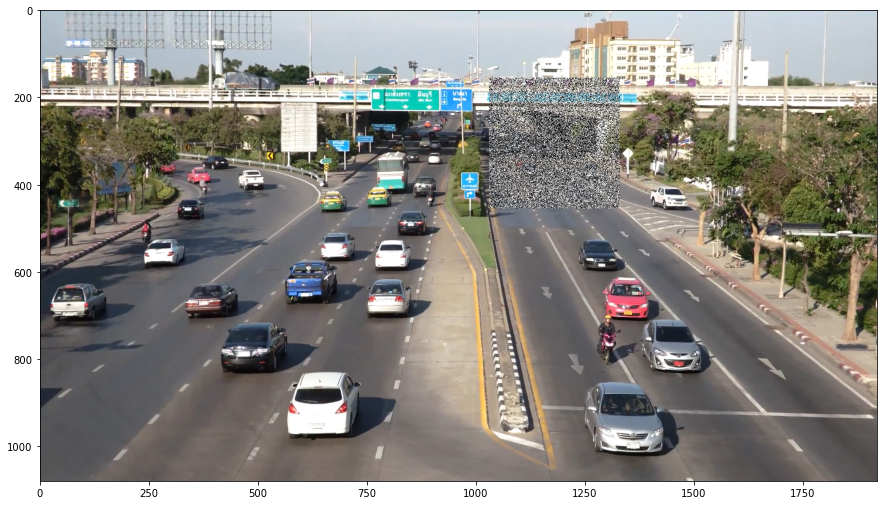

In [103]:
img2 = img.copy()
img2[y0:y1, x0:x1] = crop_img

plt.figure(figsize=(15, 13))
plt.imshow(img2)
plt.show()

# Test Multiple

center: [1485 268]


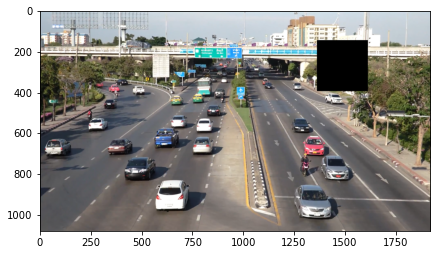

center: [1020 606]


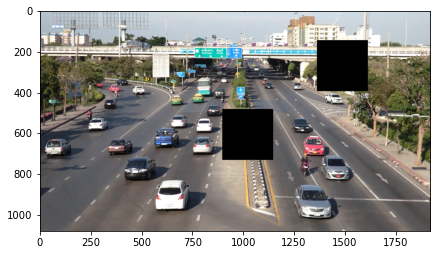

center: [602 730]


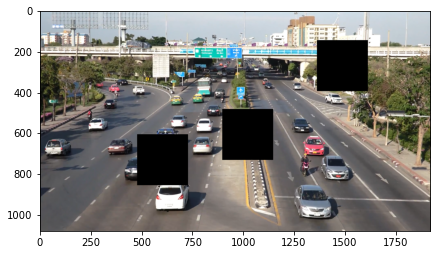

In [118]:
img2 = img.copy()
w = 250
h = 250

for i in range(3):
    cx = random.randint(w, img.shape[1]-w)
    cy = random.randint(w, img.shape[0]-h)
    [y0, y1, x0, x1], crop_img = crop_rect(img, [cx, cy], w, h, True)
    
    crop_img = sp_noise(crop_img, 1)
    
    img2[y0:y1, x0:x1] = crop_img
    
    print("center: [{} {}]".format(cx, cy))
    plt.figure(figsize=(7, 5))
    plt.imshow(img2)
    plt.show()